In [1]:
# Import library
import pandas as pd
import numpy as np

# Module for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To avoid unnecessary warning messages.
import warnings
warnings.filterwarnings('ignore')


# Built-in datasets
from sklearn.datasets import load_breast_cancer

# Create standardized data
from sklearn.preprocessing import StandardScaler

# Module for logistic regression model
from sklearn.linear_model import LogisticRegression

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

sns.set(style='white', context='notebook', palette='deep')

# all togetther

In [3]:
df = pd.read_csv('Aemf1.csv')

In [5]:
df.head()

,ID,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,1,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,2,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,3,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,4,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,5,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           41714 non-null  int64  
 1   City                         41714 non-null  object 
 2   Price                        41714 non-null  float64
 3   Day                          41714 non-null  object 
 4   Room Type                    41714 non-null  object 
 5   Shared Room                  41714 non-null  bool   
 6   Private Room                 41714 non-null  bool   
 7   Person Capacity              41714 non-null  int64  
 8   Superhost                    41714 non-null  bool   
 9   Multiple Rooms               41714 non-null  int64  
 10  Business                     41714 non-null  int64  
 11  Cleanliness Rating           41714 non-null  int64  
 12  Guest Satisfaction           41714 non-null  int64  
 13  Bedrooms        

In [7]:
#Remove unnecessary columns
df = df.drop('ID', axis=1)
df = df.drop('City', axis=1)
df = df.drop('Shared Room', axis=1)
df = df.drop('Private Room', axis=1)
df = df.drop('Multiple Rooms', axis=1)
df = df.drop('Business', axis=1)
df = df.drop('Attraction Index', axis=1)
df = df.drop('Restraunt Index', axis=1)

In [9]:
#Convert to dummy data  
df = pd.get_dummies(df, drop_first=True)
df.head()

,Price,Person Capacity,Superhost,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,Day_Weekend,Room Type_Private room,Room Type_Shared room
0,194.033698,2,False,10,93,1,5.022964,2.539380,4.166708,6.846473,0,1,0
1,344.245776,4,False,8,85,1,0.488389,0.239404,33.421209,58.342928,0,1,0
2,264.101422,2,False,9,87,1,5.748312,3.651621,3.985908,6.646700,0,1,0
3,433.529398,4,False,9,90,2,0.384862,0.439876,26.119108,60.973565,0,1,0
4,485.552926,2,True,10,98,1,0.544738,0.318693,29.272733,56.811677,0,1,0


In [10]:
# Removed a price data which is above $5000
df = df[df["Price"]<5000]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41700 entries, 0 to 41713
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        41700 non-null  float64
 1   Person Capacity              41700 non-null  int64  
 2   Superhost                    41700 non-null  bool   
 3   Cleanliness Rating           41700 non-null  int64  
 4   Guest Satisfaction           41700 non-null  int64  
 5   Bedrooms                     41700 non-null  int64  
 6   City Center (km)             41700 non-null  float64
 7   Metro Distance (km)          41700 non-null  float64
 8   Normalised Attraction Index  41700 non-null  float64
 9   Normalised Restraunt Index   41700 non-null  float64
 10  Day_Weekend                  41700 non-null  uint8  
 11  Room Type_Private room       41700 non-null  uint8  
 12  Room Type_Shared room        41700 non-null  uint8  
dtypes: bool(1), floa

In [11]:
#Independent variables
x = df[['Day_Weekend',
        'Room Type_Private room', 
        'Room Type_Shared room', 
        'Person Capacity', 
        'Cleanliness Rating',
        'Guest Satisfaction',
        'Bedrooms',
        'City Center (km)',
        'Metro Distance (km)',
        'Normalised Attraction Index',
        'Normalised Restraunt Index']]

In [12]:
#Dependent variable
y = df['Price']

In [13]:
#Devide into test data and train data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
#Making a liner model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [15]:
predictions = model.predict(x_test)
predictions

array([211.99865357, 295.34040416, 324.57000949, ..., 207.97472546,
       380.9499467 , 401.23682691])

<AxesSubplot:xlabel='Price'>

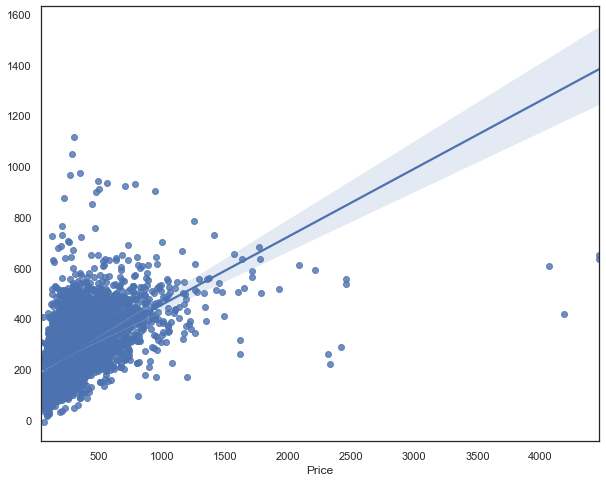

In [16]:
plt.figure(figsize=(10,8))
sns.regplot(y_test,predictions)

In [17]:
coeff_parameter = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Day_Weekend,9.222793
Room Type_Private room,-61.454721
Room Type_Shared room,-137.774485
Person Capacity,12.022495
Cleanliness Rating,4.734188
Guest Satisfaction,-0.105879
Bedrooms,78.033674
City Center (km),11.042017
Metro Distance (km),-1.403721
Normalised Attraction Index,8.562638


In [18]:
# print the intercept
print(model.intercept_)

-51.46095634918504


In [19]:
import statsmodels.api as sm
x_train_Sm= sm.add_constant(x_train)
#X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,x_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1137.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:58:04   Log-Likelihood:            -2.1945e+05
No. Observations:               33360   AIC:                         4.389e+05
Df Residuals:                   33348   BIC:                         4.390e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             